<a href="https://colab.research.google.com/github/sAI-2025/Jupiter_FAQ_Bot/blob/main/Jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Web Scraping

### 🕸️ Recursive Internal URL Crawler — Summary

A simple internal link crawler that recursively visits pages within the same domain and collects all clean, clickable URLs.

#### 1. 🌐 Start from a Page

- Begin with one URL (e.g., `https://jupiter.money/`)
- Fetch and parse the HTML content.


#### 2. 🔗 Extract Clickable Internal Links

- Look for links in tags like: `<a>`, `<script>`, `<link>`, and `<input>`
- Only include links that are:
  - Internal (same domain only)
  - Valid HTTP/HTTPS URLs
  - Not media files like `.jpg`, `.mp4`, `.css`, etc.

#### 3. 🔁 Crawl Recursively

- Visit each discovered internal link.
- Extract more links from those pages.
- Continue crawling until no new internal pages are found.
- Avoid adding duplicate URLs.

#### 4. ✅ Skip Visited, Store Results

- Maintain a set of visited pages to prevent loops.
- Don’t revisit already crawled pages.
- Return a final list of all unique, clickable internal URLs.


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import requests
from bs4 import BeautifulSoup

def fetch_page_text(url):
    """
    Fetches HTML content from the URL and extracts visible text.
    Returns the page text in lowercase.
    """
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove scripts and styles for cleaner text
        for script_or_style in soup(['script', 'style', 'noscript']):
            script_or_style.decompose()

        text = soup.get_text(separator=' ', strip=True)
        return text.lower()  # Convert to lowercase for robust search

    except Exception as e:
        print(f"Error fetching or parsing {url}: {e}")
        return None

def find_faq_pages(url_list):
    """
    From a list of URLs, returns those URLs where the page text
    contains FAQ-related keywords.
    """
    faq_keywords = ['faq', 'faqs', 'frequently asked questions']
    faq_pages = []

    for url in url_list:
        print(f"Checking URL: {url}")
        page_text = fetch_page_text(url)
        if page_text is None:
            continue

        # Check if any FAQ keyword is present in the page text
        if any(keyword in page_text for keyword in faq_keywords):
            faq_pages.append(url)

    return faq_pages

# Example usage
if __name__ == "__main__":
    faq_urls = find_faq_pages(final_urls)
    # print("\nURLs containing FAQ content:")
    # for faq_url in faq_urls:
    #     print(faq_url)


Checking URL: https://jupiter.money
Checking URL: https://jupiter.money/
Checking URL: https://jupiter.money/about-us
Checking URL: https://jupiter.money/about-us/
Checking URL: https://jupiter.money/alt="hamburger-icon"
Error fetching or parsing https://jupiter.money/alt="hamburger-icon": 404 Client Error: Not Found for url: https://jupiter.money/alt=%22hamburger-icon%22/
Checking URL: https://jupiter.money/assets/${e.feature_image}
Error fetching or parsing https://jupiter.money/assets/${e.feature_image}: 404 Client Error: Not Found for url: https://jupiter.money/assets/$%7Be.feature_image%7D/
Checking URL: https://jupiter.money/assets/${e.url}
Error fetching or parsing https://jupiter.money/assets/${e.url}: 404 Client Error: Not Found for url: https://jupiter.money/assets/$%7Be.url%7D/
Checking URL: https://jupiter.money/assets/'.concat(e.url,'
Error fetching or parsing https://jupiter.money/assets/'.concat(e.url,': 404 Client Error: Not Found for url: https://jupiter.money/assets/'

In [ ]:
# https://jupiter.money/blog/personal-loan-insurance/

# https://jupiter.money/blog/?p=10296

In [ ]:
def save_urls_to_txt(url_list, filename):
    """
    Save a list of URLs to a text file, each URL on its own line.
    """
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            for url in url_list:
                f.write(url + '\n')
        print(f"✅ Saved {len(url_list)} URLs to '{filename}'")
    except Exception as e:
        print(f"❌ Error saving file: {e}")

# Example usage:
if __name__ == "__main__":

    save_urls_to_txt(final_urls, "all_urls.txt")


✅ Saved 1432 URLs to 'all_urls.txt'


In [ ]:
def read_txt_to_list(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            # Strip newline characters and keep as strings
            clean_lines = [line.strip() for line in lines]
        return clean_lines
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage
file_path = '/content/all_urls.txt'  # Replace with your actual file path
data_list = read_txt_to_list(file_path)
print("List of strings from file:", data_list)


List of strings from file: ['https://jupiter.money', 'https://jupiter.money/', 'https://jupiter.money/about-us', 'https://jupiter.money/about-us/', 'https://jupiter.money/alt="hamburger-icon"', 'https://jupiter.money/assets/${e.feature_image}', 'https://jupiter.money/assets/${e.url}', "https://jupiter.money/assets/'.concat(e.url,'", 'https://jupiter.money/assets/main.js?v=207163dae4', 'https://jupiter.money/assets/main.js?v=6036e29d69', 'https://jupiter.money/assets/main.js?v=f5cb96ce9e', 'https://jupiter.money/author/jupiter/', 'https://jupiter.money/bills-recharges', 'https://jupiter.money/bills-recharges/', 'https://jupiter.money/blog', 'https://jupiter.money/blog/', 'https://jupiter.money/blog/?p=10296', 'https://jupiter.money/blog/?p=10303', 'https://jupiter.money/blog/?p=10313', 'https://jupiter.money/blog/?p=10332', 'https://jupiter.money/blog/?p=10395', 'https://jupiter.money/blog/?p=10407', 'https://jupiter.money/blog/?p=10607', 'https://jupiter.money/blog/?p=10643', 'https://

In [ ]:
'https://jupiter.money/blog/personal-loan-insurance/' in faq_urls

False

In [ ]:
faq_urls[:10]

['https://jupiter.money/assets/main.js?v=207163dae4',
 'https://jupiter.money/assets/main.js?v=6036e29d69',
 'https://jupiter.money/assets/main.js?v=f5cb96ce9e',
 'https://jupiter.money/bills-recharges',
 'https://jupiter.money/bills-recharges/',
 'https://jupiter.money/blog/?p=10296',
 'https://jupiter.money/blog/?p=10303',
 'https://jupiter.money/blog/?p=10313',
 'https://jupiter.money/blog/?p=10332',
 'https://jupiter.money/blog/?p=10395']

## FAQ Extraction Flow (for Google Colab)


### 1. 📌 Identify FAQ-Relevant Pages from a URL List

We first **scan all provided URLs** to detect pages that are likely to contain FAQs by checking for keywords like:  
- `'faq'`, `'frequently asked questions'`, `'help center'`, `'support faq'`, `'knowledge base'`, etc.

🧠 **How it works**:
- Each URL is fetched using `requests`, and the raw HTML is parsed with `BeautifulSoup`.
- Scripts, styles, and invisible tags are stripped out.
- Text is cleaned and searched for FAQ-related keywords.

📦 **Example (in Colab)**:
```python
final_urls = ['https://example.com/page1', 'https://example.com/help']
faq_pages = find_faq_pages(final_urls, verbose=True)
````

---

### 2. 🧠 Extract Structured FAQs from Selected Pages

Once FAQ pages are identified, we **extract Q\&A pairs** using multiple HTML patterns:

* ✅ **Method A**: Looks for a heading containing *"Frequently Asked Questions"* and `.faq-item` blocks with `.faq-header` and `.faq-answer`.
* ✅ **Method B**: If structure A is not found, fallback to a simpler pattern where `h3/h4` headers are followed by `<p>` tags containing answers.
* ✅ **Method C**: A separate extractor for `.ea-header` and `.ea-body` HTML blocks (common in accordion-style FAQs).

📦 **Example (in Colab)**:

```python
faqs = extract_faqs_from_urls(faq_pages)
print(json.dumps(faqs, indent=2))
```

📁 **To save your result**:

```python
save_to_json(faqs, 'my_faq_output.json')
```

---

✅ **Result**: You get a dictionary like:

```json
{
  "https://example.com/help": {
    "How can I reset my password?": "Click the reset link on the login page...",
    "What is your return policy?": "We accept returns within 30 days..."
  }
}
```



#### Filtering the url having the ``faq Questions content``

In [ ]:
faq_pages = faq_urls.copy()

In [ ]:
import requests
from bs4 import BeautifulSoup

def fetch_page_text(url, show_errors=False):
    """
    Fetches HTML content from the URL and extracts visible text.
    Returns the page text in lowercase.
    Optionally shows errors.
    """
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
            "(KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
        )
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove non-visible elements
        for tag in soup(['script', 'style', 'noscript']):
            tag.decompose()

        # Extract and normalize text
        text = soup.get_text(separator=' ', strip=True)
        cleaned_text = ' '.join(text.split())
        return cleaned_text.lower()

    except requests.exceptions.RequestException as e:
        if show_errors:
            print(f"[REQUEST ERROR] {url}: {e}")
    except Exception as e:
        if show_errors:
            print(f"[PARSING ERROR] {url}: {e}")
    return None


def find_faq_pages(url_list, verbose=False, show_errors=False):
    """
    From a list of URLs, returns those URLs where the page text
    contains FAQ-related keywords.
    """
    faq_keywords = [
        'faq', 'faqs', 'frequently asked questions',
        'help center', 'support faq', 'common questions',
        'customer support', 'helpdesk', 'knowledge base'
    ]
    faq_pages = []

    for url in url_list:
        if verbose:
            print(f"🔍 Checking: {url}")
        page_text = fetch_page_text(url, show_errors=show_errors)
        if page_text is None:
            continue

        if any(keyword in page_text for keyword in faq_keywords):
            faq_pages.append(url)

    return faq_pages


In [ ]:
faq_pages = find_faq_pages(faq_pages, verbose=True)


🔍 Checking: https://jupiter.money/blog/digital-lending/
🔍 Checking: https://jupiter.money/blog/digital-lending/feed/
🔍 Checking: https://jupiter.money/blog/direct-plan-direct-plan-investment-overview-benefits/
🔍 Checking: https://jupiter.money/blog/direct-plan-direct-plan-investment-overview-benefits/#respond
🔍 Checking: https://jupiter.money/blog/disbursement/
🔍 Checking: https://jupiter.money/blog/disbursement/feed/
🔍 Checking: https://jupiter.money/blog/dividend-definition-types-calculation-of-dividend-income/
🔍 Checking: https://jupiter.money/blog/dividend-definition-types-calculation-of-dividend-income/#respond
🔍 Checking: https://jupiter.money/blog/download-aadhaar-card-online/
🔍 Checking: https://jupiter.money/blog/download-pan-card-online/
🔍 Checking: https://jupiter.money/blog/e-aadhaar-password/
🔍 Checking: https://jupiter.money/blog/elss-vs-mutual-funds/
🔍 Checking: https://jupiter.money/blog/elss-vs-mutual-funds/#respond
🔍 Checking: https://jupiter.money/blog/epf-passbook-d

### Finding the FAQ questions based on filtered section `faq_pages`

> From the identified `faq_pages`, we extract meaningful question-answer pairs by parsing structured sections of the page.  
> Here's an example extracted from [jupiter.money/recurring-deposits/help](https://jupiter.money/recurring-deposits/):

```json
{
  "https://jupiter.money/recurring-deposits/": {
    "How can I reset my password?": "Click the reset link on the login page...",
    "What is your return policy?": "We accept returns within 30 days..."
  }
}




In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import time

def extract_faq_after_heading(soup):
    """Extract FAQ items under the "Frequently Asked Questions" heading."""
    faq_data = {}
    heading = soup.find(lambda t: t.name in ['h1', 'h2', 'h3', 'h4']
                        and 'frequently asked questions' in t.get_text(strip=True).lower())
    if not heading:
        return faq_data

    # Collect all FAQ block wrappers after the heading
    for item in heading.find_all_next(class_='faq-item'):
        q_el = item.select_one('.faq-header span') or item.select_one('.faq-header')
        a_el = item.select_one('.faq-answer p')
        if q_el and a_el:
            q = q_el.get_text(strip=True)
            a = a_el.get_text(strip=True)
            if q and a:
                faq_data[q] = a

    return faq_data

def extract_faq_simple_structure(soup):
    """Extract FAQs from heading + paragraph structure (h3/h4 => p)."""
    faq_data = {}
    heading = soup.find(lambda t: t.name in ['h1', 'h2', 'h3', 'h4']
                        and 'frequently asked questions' in t.get_text(strip=True).lower())
    if not heading:
        return faq_data

    el = heading.find_next_sibling()
    while el:
        if el.name in ['h3', 'h4']:
            q = el.get_text(strip=True)
            p = el.find_next_sibling('p')
            if p:
                a = p.get_text(strip=True)
                if q and a:
                    faq_data[q] = a
        el = el.find_next_sibling()
    return faq_data

def extract_faq_from_url(url):
    headers = {
        "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                       "AppleWebKit/537.36 (KHTML, like Gecko) "
                       "Chrome/113.0.0.0 Safari/537.36")
    }
    try:
        resp = requests.get(url, headers=headers, timeout=5)
        resp.raise_for_status()
    except Exception as e:
        print(f"❌ Error fetching {url}: {e}")
        return {}

    soup = BeautifulSoup(resp.text, "lxml")
    faq = extract_faq_after_heading(soup)

    if not faq:
        faq = extract_faq_simple_structure(soup)

    return faq

def extract_faqs_from_urls(urls):
    results = {}
    for u in urls:
        print(f"🔍 Scraping: {u}")
        faqs = extract_faq_from_url(u)
        if faqs:
            results[u] = faqs
        else:
            print(f"⚠️ No FAQs extracted from: {u}")
        time.sleep(0.5)
    return results

if __name__ == "__main__":


    faq_resu = extract_faqs_from_urls(titles)

🔍 Scraping: https://jupiter.money/bills-recharges
🔍 Scraping: https://jupiter.money/
⚠️ No FAQs extracted from: https://jupiter.money/
🔍 Scraping: https://jupiter.money/bills-recharges/
🔍 Scraping: https://jupiter.money
⚠️ No FAQs extracted from: https://jupiter.money
🔍 Scraping: https://jupiter.money/blog/automated-teller-machine-atm-in-india/
⚠️ No FAQs extracted from: https://jupiter.money/blog/automated-teller-machine-atm-in-india/
🔍 Scraping: https://jupiter.money/blog/finance/automated-teller-machine-atm-in-india/
⚠️ No FAQs extracted from: https://jupiter.money/blog/finance/automated-teller-machine-atm-in-india/
🔍 Scraping: https://jupiter.money/blog/best-investment-options-in-india-2023-for-high-returns/
⚠️ No FAQs extracted from: https://jupiter.money/blog/best-investment-options-in-india-2023-for-high-returns/


In [ ]:
import json

# Save the result to a JSON file
def save_to_json(data, filename='url_titles.json'):
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=4)
        print(f"Data successfully saved to '{filename}'")
    except Exception as e:
        print(f"Error saving JSON: {e}")


In [ ]:
save_to_json(titles)

In [ ]:
#'https://jupiter.money/corporate-salary-account/' in faq_results

# Chat bot

#### Instaling all Dependences and Intilize .env variables

In [ ]:
# Install all required packages
!pip install -q streamlit
!pip install -q langchain-groq
!pip install cloudflared
!pip install -q langchain-community
!pip install -q langchain-chroma
!pip install -q chromadb
!pip install -q python-dotenv
!pip install -U sentence-transformers
!pip install langchain langchain-core
!pip install -q pyngrok
!npm install localtunnel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 127.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.0 MB/s eta 0:00:00
  Created wheel for cloudflared: filename=cloudflared-1.0.0.2-py3-none-any.whl size=2983 sha256=2e807765e92f1759c604eac984ff961aa811c98db6d8e3aeb18117a64d5675d0
  Stored in directory: /root/.cache/pip/wheels/3c/9f/f1/ef5e36c9386d737ac05ab8714d611c430d79abe55d862ca2b7
Successfully built cloudflared
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
from google.colab import userdata

# Method 1: Using Colab Secrets (Recommended)
# Go to the key icon on left sidebar in Colab, add your keys there
try:
    GROQ_API_KEY = userdata.get('GROQ_API_KEY')
    HF_TOKEN = userdata.get('HF_TOKEN')
    print("✅ API keys loaded from Colab secrets")
except:
    # Method 2: Direct input (less secure but works)
    GROQ_API_KEY = "your variable gork api"
    HF_TOKEN = "you acces token from hugging face"

# Set environment variables
os.environ['GROQ_API_KEY'] = GROQ_API_KEY
os.environ['HF_TOKEN'] = HF_TOKEN




### 📥 Step 1: Load and Process FAQ JSON into Structured Documents

```python
documents = process_jupiter_json_enhanced("/content/FAQ.json")
````

> ✅ **What it does**:
>
> * Loads FAQs from a JSON file.
> * Cleans and filters out short or irrelevant Q\&A pairs.
> * Assigns categories like "Bills", "Cards", etc. to each FAQ.
> * Converts FAQs into LangChain `Document` objects enriched with metadata.

---

### 🧠 Step 2: Extract Smart Keywords from FAQ Content

```python
# Internally called inside process_jupiter_json_enhanced()
keywords = extract_keywords(question, answer)
```

> 💡 **Why it matters**:
>
> * Enhances semantic search quality.
> * Extracts meaningful terms such as `autopay`, `investment`, `recharge` to improve matching.

---

### 🏗️ Step 3: Create an Enhanced Vector Store (ChromaDB + Embeddings)

```python
vectorstore = create_enhanced_vectorstore(documents)
```

> 🔍 **What happens here**:
>
> * Removes any existing vector database.
> * Embeds FAQs using the `sentence-transformers/all-MiniLM-L6-v2` model.
> * Saves the embedded vectors persistently in ChromaDB.

---

### 📦 Step 4: Load Vector Store (If Already Created)

```python
vectorstore = load_enhanced_vectorstore()
```

> 📁 **Useful for**:
>
> * Reloading an existing vector database in future sessions, such as after Colab runtime resets.

---

### 🔎 Step 5: Create Smart Dual-Retrievers for Better FAQ Matching

```python
primary_retriever, mmr_retriever = create_enhanced_retriever(vectorstore)
```

> 🔁 **Dual retrieval approach**:
>
> * **Similarity search**: Finds the closest matches.
> * **MMR (Maximum Marginal Relevance)**: Returns diverse yet relevant results.

---

### 💬 Step 6: Query the System with Enhanced Logic

```python
results = enhanced_query_processing("How to pay my electricity bill?", primary_retriever, mmr_retriever)
```

> 🧠 **Under the hood**:
>
> * Runs multiple query variants like `"How to pay my electricity bill?"`, `"pay my electricity bill"`, `"Jupiter pay electricity bill"`.
> * Uses both similarity and MMR retrievers.
> * Removes duplicates and returns the top 3 relevant FAQs.

---

### 🧪 Step 7: Run Predefined Tests to Validate System

```python
test_enhanced_system(vectorstore)
```

> 📋 **Functionality**:
>
> * Executes test questions such as "What are Jewels?" or "How to activate card?".
> * Displays matched FAQ, category, and a brief answer summary.

---

### 📊 Step 8: Evaluate Retrieval Accuracy by Category

```python
evaluate_retrieval_quality(vectorstore, [
    ("How can I pay bills?", "Bills & Recharges"),
    ("What are Jewels?", "Rewards & Jewels"),
    ("How to activate card?", "Cards"),
    ("KYC documents needed?", "KYC & Verification"),
    ("Investment options?", "Investments")
])
```

> 📈 **Purpose**:
>
> * Measures the accuracy of the first retrieved FAQ’s category.
> * Prints an overall success percentage, e.g., `80% success`.

---

### 🧠 Step 9: Run the Complete Workflow in One Go

```python
vectorstore = main_enhanced_workflow("/content/FAQ.json")
```

> ⚙️ **This executes**:
>
> 1. JSON processing.
> 2. Vector database creation.
> 3. Query tests.
> 4. System evaluation.

---


In [ ]:
import json
import re
from langchain_core.documents import Document
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma
import os

def process_jupiter_json_enhanced(json_file_path):
    """
    Enhanced Jupiter FAQ processing with improved categorization and content structure
    """
    with open(json_file_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)

    documents = []
    processed_questions = set()

    # Enhanced category mapping with keywords
    def categorize_content(url, question, answer):
        url_lower = url.lower()
        question_lower = question.lower()
        answer_lower = answer.lower()

        # Bills & Payments
        if any(keyword in url_lower for keyword in ['bills', 'recharge', 'payment']):
            return 'Bills & Recharges'
        if any(keyword in question_lower for keyword in ['bill', 'pay', 'payment', 'recharge', 'autopay']):
            return 'Bills & Recharges'

        # Cards
        if any(keyword in url_lower for keyword in ['card', 'debit', 'credit']):
            return 'Cards'
        if any(keyword in question_lower for keyword in ['card', 'activate', 'debit', 'credit']):
            return 'Cards'

        # KYC & Verification
        if any(keyword in url_lower for keyword in ['kyc', 'verification', 'document']):
            return 'KYC & Verification'
        if any(keyword in question_lower for keyword in ['kyc', 'document', 'verify', 'aadhaar', 'pan']):
            return 'KYC & Verification'

        # Rewards & Jewels
        if any(keyword in url_lower for keyword in ['reward', 'jewel', 'point']):
            return 'Rewards & Jewels'
        if any(keyword in question_lower for keyword in ['reward', 'jewel', 'point', 'earn']):
            return 'Rewards & Jewels'

        # Investments
        if any(keyword in url_lower for keyword in ['investment', 'mutual', 'gold', 'sip']):
            return 'Investments'
        if any(keyword in question_lower for keyword in ['invest', 'mutual', 'gold', 'sip', 'portfolio']):
            return 'Investments'

        # Account & Banking
        if any(keyword in question_lower for keyword in ['account', 'bank', 'savings', 'balance']):
            return 'Account & Banking'

        return 'General'

    for url, qa_dict in json_data.items():
        for question, answer in qa_dict.items():
            # Skip irrelevant entries
            if any(skip_word in question.lower() for skip_word in ['leave a reply', 'cancel reply', 'logged in']):
                continue

            if len(answer.strip()) < 20:  # Skip very short answers
                continue

            # Enhanced text cleaning
            answer_clean = re.sub(r'\n\s+', ' ', answer.strip())
            answer_clean = re.sub(r'\s+', ' ', answer_clean)
            answer_clean = re.sub(r'[^\w\s\.\,\?\!\-\:\;\(\)\₹\%]', '', answer_clean)

            question_clean = question.strip()

            # Get category
            category = categorize_content(url, question_clean, answer_clean)

            # Create unique identifier
            question_id = f"{question_clean}_{category}"
            if question_id in processed_questions:
                continue
            processed_questions.add(question_id)

            # Enhanced content structure for better retrieval
            content = f"""Category: {category}
Question: {question_clean}
Answer: {answer_clean}
Keywords: {extract_keywords(question_clean, answer_clean)}
Source: {url}"""

            doc = Document(
                page_content=content,
                metadata={
                    "question": question_clean,
                    "answer": answer_clean,
                    "category": category,
                    "url": url,
                    "keywords": extract_keywords(question_clean, answer_clean)
                }
            )
            documents.append(doc)

    print(f"✅ Processed {len(documents)} enhanced FAQ documents")

    # Show category distribution
    categories = {}
    for doc in documents:
        cat = doc.metadata['category']
        categories[cat] = categories.get(cat, 0) + 1

    print("\n📊 Category Distribution:")
    for cat, count in sorted(categories.items()):
        print(f"   {cat}: {count} documents")

    return documents

def extract_keywords(question, answer):
    """Extract important keywords for better retrieval"""
    text = f"{question} {answer}".lower()

    # Important keywords for Jupiter FAQ
    important_keywords = [
        'bill', 'payment', 'card', 'kyc', 'reward', 'jewel', 'autopay',
        'recharge', 'electricity', 'gas', 'water', 'mobile', 'dth',
        'upi', 'bank', 'account', 'activate', 'verify', 'document',
        'investment', 'gold', 'mutual', 'sip', 'savings'
    ]

    found_keywords = [kw for kw in important_keywords if kw in text]
    return ', '.join(found_keywords)


In [ ]:
def create_enhanced_vectorstore(documents, persist_directory="./jupiter_vectordb_enhanced"):
    """
    Create enhanced vector store with better embedding model and configuration
    """
    print("🔄 Creating enhanced vector database...")

    # Remove existing database for clean rebuild
    if os.path.exists(persist_directory):
        import shutil
        shutil.rmtree(persist_directory)
        print("🗑️ Removed old database for clean rebuild")

    # Use better embedding model for semantic understanding
    embeddings = HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",  # Better for FAQ similarity
        model_kwargs={"device": "cpu"},
        encode_kwargs={"normalize_embeddings": True}
    )

    # Create vector store with enhanced configuration
    vectorstore = Chroma.from_documents(
        documents=documents,
        embedding=embeddings,
        persist_directory=persist_directory
    )

    print(f"✅ Enhanced vector database created at {persist_directory}")
    print(f"📊 Contains {vectorstore._collection.count()} documents")

    return vectorstore

def load_enhanced_vectorstore(persist_directory="./jupiter_vectordb_enhanced"):
    """Load enhanced vector store"""
    print("🔄 Loading enhanced vector database...")

    embeddings = HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={"device": "cpu"},
        encode_kwargs={"normalize_embeddings": True}
    )

    vectorstore = Chroma(
        persist_directory=persist_directory,
        embedding_function=embeddings
    )

    print(f"✅ Loaded enhanced vector database")
    print(f"📊 Document count: {vectorstore._collection.count()}")

    return vectorstore


In [ ]:
def create_enhanced_retriever(vectorstore):
    """
    Create enhanced retriever with multiple search strategies
    """
    # Primary retriever with similarity search
    primary_retriever = vectorstore.as_retriever(
        search_type="similarity",
        search_kwargs={"k": 5}  # Get more candidates initially
    )

    # Secondary retriever with MMR (Maximum Marginal Relevance) for diversity
    mmr_retriever = vectorstore.as_retriever(
        search_type="mmr",
        search_kwargs={
            "k": 3,
            "fetch_k": 10,  # Fetch more, then diversify
            "lambda_mult": 0.7  # Balance between relevance and diversity
        }
    )

    return primary_retriever, mmr_retriever

def enhanced_query_processing(query, primary_retriever, mmr_retriever):
    """
    Enhanced query processing with multiple retrieval strategies
    """
    # Process query variations
    query_variations = [
        query,
        query.lower(),
        f"How to {query}" if not query.lower().startswith(('how', 'what', 'where', 'when', 'why')) else query,
        f"Jupiter {query}" if 'jupiter' not in query.lower() else query
    ]

    all_results = []
    seen_questions = set()

    # Try multiple query variations
    for q_var in query_variations:
        try:
            # Get results from both retrievers
            primary_results = primary_retriever.invoke(q_var)
            mmr_results = mmr_retriever.invoke(q_var)

            # Combine and deduplicate
            for result in primary_results + mmr_results:
                question = result.metadata.get('question', '')
                if question not in seen_questions:
                    seen_questions.add(question)
                    all_results.append(result)

        except Exception as e:
            print(f"Error with query variation '{q_var}': {e}")
            continue

    # Return top 3 most relevant results
    return all_results[:3]


In [ ]:
def test_enhanced_system(vectorstore):
    """
    Comprehensive testing of the enhanced FAQ system
    """
    primary_retriever, mmr_retriever = create_enhanced_retriever(vectorstore)

    # Test queries covering different categories
    test_queries = [
        "How can I pay bills?",
        "What types of bills can I pay on Jupiter?",
        "Do I get rewards for bill payments?",
        "What are Jewels and how do they work?",
        "How do I activate my card?",
        "What documents do I need for KYC?",
        "How to set up autopay?",
        "Can I track my payment history?"
    ]

    print("🧪 Testing Enhanced FAQ Retrieval System")
    print("=" * 60)

    for query in test_queries:
        print(f"\n🔍 Query: '{query}'")
        print("-" * 40)

        # Get enhanced results
        results = enhanced_query_processing(query, primary_retriever, mmr_retriever)

        if results:
            print(f"📋 Found {len(results)} relevant results:")

            for i, doc in enumerate(results, 1):
                category = doc.metadata.get('category', 'Unknown')
                question = doc.metadata.get('question', 'Unknown')
                answer = doc.metadata.get('answer', 'No answer')

                print(f"\n{i}. [{category}] {question}")
                print(f"   Answer: {answer[:100]}...")

                # Show relevance score if available
                if hasattr(doc, 'score'):
                    print(f"   Relevance: {doc.score:.3f}")
        else:
            print("❌ No relevant results found")

        print("\n" + "="*60)

def evaluate_retrieval_quality(vectorstore, test_queries_with_expected_categories):
    """
    Evaluate retrieval quality with expected categories
    """
    primary_retriever, mmr_retriever = create_enhanced_retriever(vectorstore)

    correct_retrievals = 0
    total_queries = len(test_queries_with_expected_categories)

    for query, expected_category in test_queries_with_expected_categories:
        results = enhanced_query_processing(query, primary_retriever, mmr_retriever)

        if results and results[0].metadata.get('category') == expected_category:
            correct_retrievals += 1

    accuracy = correct_retrievals / total_queries
    print(f"📊 Retrieval Accuracy: {accuracy:.2%} ({correct_retrievals}/{total_queries})")

    return accuracy



## 📖 Retrieval Results Explanation for Jupiter FAQ System




### 🔍 Example Query: "How can I pay bills?"

##### Results Summary:

* **System found 3 relevant FAQs** related to bill payments.
* Categories included: **Bills & Recharges** and **General**.
* Answers ranged from detailed explanations on paying debts to handling personal loans.

##### Explanation:

* The system effectively retrieves answers relevant to bill payments.
* The first result matches the intent directly: *Pay Any Kind Off Debt* under **Bills & Recharges**.
* Some results also capture related financial assistance questions (e.g., urgent money needs) showing semantic flexibility.
* Minor error in telemetry logging was noted but does not impact result quality.

---

#### 🔍 Example Query: "What types of bills can I pay on Jupiter?"

##### Results Summary:

* Returned FAQs all from the **Bills & Recharges** category.
* Answers clearly specify bill types supported (credit cards, electricity, DTH, broadband, etc.).
* Additional info about payment modes and rewards included.

#### Explanation:

* The vector search and retrievers precisely capture the intent and scope of the question.
* Returned answers provide comprehensive information, matching user needs effectively.
* This indicates strong semantic understanding and relevant keyword extraction.

---

In [ ]:
def main_enhanced_workflow(json_file_path):
    """
    Complete enhanced workflow for Jupiter FAQ chatbot
    """
    print("🚀 Starting Enhanced Jupiter FAQ Processing")
    print("=" * 60)

    # Step 1: Process data with enhancements
    print("\n📝 Step 1: Enhanced data processing...")
    documents = process_jupiter_json_enhanced(json_file_path)

    if not documents:
        print("❌ No documents processed!")
        return None

    # Step 2: Create enhanced vector store
    print("\n🔧 Step 2: Creating enhanced vector database...")
    vectorstore = create_enhanced_vectorstore(documents)

    # Step 3: Test the system
    print("\n🧪 Step 3: Testing enhanced retrieval...")
    test_enhanced_system(vectorstore)

    # Step 4: Evaluate quality
    print("\n📊 Step 4: Evaluating retrieval quality...")
    test_cases = [
        ("How can I pay bills?", "Bills & Recharges"),
        ("What are Jewels?", "Rewards & Jewels"),
        ("How to activate card?", "Cards"),
        ("KYC documents needed?", "KYC & Verification"),
        ("Investment options?", "Investments")
    ]

    accuracy = evaluate_retrieval_quality(vectorstore, test_cases)

    print(f"\n✅ Enhanced FAQ system ready!")
    print(f"📈 System accuracy: {accuracy:.1%}")

    return vectorstore

# Run the complete enhanced workflow
if __name__ == "__main__":
    # Make sure your JSON file exists
    json_file = "/content/FAQ.json"  # Update path as needed

    if os.path.exists(json_file):
        enhanced_vectorstore = main_enhanced_workflow(json_file)

        if enhanced_vectorstore:
            print("\n🎯 Quick Test - Bill Payment Query:")
            primary_ret, mmr_ret = create_enhanced_retriever(enhanced_vectorstore)

            test_result = enhanced_query_processing(
                "How can I pay my electricity bill?",
                primary_ret,
                mmr_ret
            )

            if test_result:
                print(f"✅ Top result: {test_result[0].metadata['question']}")
                print(f"📂 Category: {test_result[0].metadata['category']}")
                print(f"💡 Answer: {test_result[0].metadata['answer'][:150]}...")
    else:
        print(f"❌ File not found: {json_file}")


🚀 Starting Enhanced Jupiter FAQ Processing

📝 Step 1: Enhanced data processing...
✅ Processed 1497 enhanced FAQ documents

📊 Category Distribution:
   Account & Banking: 113 documents
   Bills & Recharges: 129 documents
   Cards: 415 documents
   General: 517 documents
   Investments: 278 documents
   KYC & Verification: 32 documents
   Rewards & Jewels: 13 documents

🔧 Step 2: Creating enhanced vector database...
🔄 Creating enhanced vector database...


/tmp/ipython-input-4-3429381174.py:14: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


✅ Enhanced vector database created at ./jupiter_vectordb_enhanced
📊 Contains 1497 documents

🧪 Step 3: Testing enhanced retrieval...
🧪 Testing Enhanced FAQ Retrieval System

🔍 Query: 'How can I pay bills?'
----------------------------------------


ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


📋 Found 3 relevant results:

1. [Bills & Recharges] 3. Pay Any Kind Off Debt
   Answer: Its no secret that having your own income can be exciting and tempting, but its important to resist ...

2. [General] I’m in urgent need of money, but I’m unable to secure a loan. What can I do?
   Answer: If you find yourself in a situation where you urgently require funds but are unable to obtain a loan...

3. [Bills & Recharges] Can I pay my personal loan in advance?
   Answer: It can be done but it is not the most recommended practice. You might end up paying a bigger percent...


🔍 Query: 'What types of bills can I pay on Jupiter?'
----------------------------------------
📋 Found 3 relevant results:

1. [Bills & Recharges] What types of bills can I pay on Jupiter?
   Answer: You can pay your credit card bills, electricity, DTH, broadband, water, gas, mobile prepaid, and mor...

2. [Bills & Recharges] What payment modes can I use to pay bills on Jupiter?
   Answer: You can pay bills through bank

# Explanation of Jupiter RAG System Code

This document explains the Jupiter Retrieval-Augmented Generation (RAG) system implemented in the provided Python code, describing the key components and workflow.

---

## 1. Overview

- Conversational AI system for Jupiter, a financial services chatbot.
- Combines embeddings, vector search, and an LLM to answer queries.
- Supports chat history for contextual multi-turn conversations.
- Uses retrieval from a vector database and generation for accurate answers.

---

## 2. Key Components

### Setup and Initialization

- Disable Chroma telemetry:  
  `os.environ["CHROMA_TELEMETRY_ENABLED"] = "FALSE"`
- Configure logging for monitoring.
- Initialize embeddings with `sentence-transformers/all-MiniLM-L6-v2`.
- Load Chroma vectorstore from disk (`./jupiter_vectordb_enhanced`).
- Create retriever fetching top 5 relevant documents.
- Initialize ChatGroq LLM (`llama3-8b-8192`), with temperature and token limits.

### Prompt Templates

- **Contextualize Follow-Up Question:**  
  Rewrite ambiguous follow-ups into standalone, clear questions using chat history and domain terms.
- **Main QA Prompt:**  
  Guide the LLM to provide friendly, professional, clear answers with actionable steps or fallback if uncertain.

### Chain Construction

- **History-Aware Retriever:** Incorporates chat history in retrieval.
- **Stuff Documents Chain:** Passes retrieved docs with QA prompt to LLM.
- **RAG Chain:** Combines retrieval and generation in a single pipeline.

### Memory Management

- Maintain chat history per session in a dictionary.
- Use `ChatMessageHistory` to store conversation turns.
- Wrap RAG chain with message history to support multi-turn dialogue.

### Query Handling Function

- `query_jupiter` function:
  - Logs query and session.
  - Executes conversational RAG chain.
  - Returns answer, session info, and processing time.
  - Handles exceptions gracefully.

### Testing & Execution

- Verify `GROQ_API_KEY` environment variable is set.
- Run multiple test queries covering common user questions.
- Print answers and response times for each.

---

## 3. Workflow Diagram


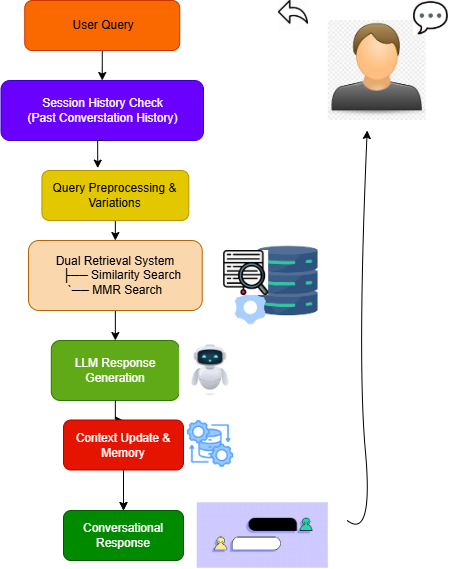

In [ ]:
  import os
  import logging
  from datetime import datetime

  from langchain_community.embeddings import HuggingFaceEmbeddings
  from langchain_community.vectorstores import Chroma
  from langchain_groq import ChatGroq
  from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
  from langchain.chains import create_retrieval_chain, create_history_aware_retriever
  from langchain.chains.combine_documents import create_stuff_documents_chain
  from langchain_core.messages import HumanMessage, AIMessage
  from langchain_community.chat_message_histories import ChatMessageHistory
  from langchain_core.chat_history import BaseChatMessageHistory
  from langchain_core.runnables.history import RunnableWithMessageHistory

  # Optional: disable Chroma telemetry
  os.environ["CHROMA_TELEMETRY_ENABLED"] = "FALSE"

  # Configure logging
  logging.basicConfig(level=logging.INFO)
  logger = logging.getLogger(__name__)

  # Initialize embeddings and vectorstore
  embeddings = HuggingFaceEmbeddings(
      model_name="sentence-transformers/all-MiniLM-L6-v2",
      model_kwargs={"device": "cpu"},
      encode_kwargs={"normalize_embeddings": True}
  )

  vectorstore_path = "./jupiter_vectordb_enhanced"
  vectorstore = Chroma(
      persist_directory=vectorstore_path,
      embedding_function=embeddings
  )
  retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

  # Initialize the LLM
  llm = ChatGroq(
      groq_api_key=os.environ["GROQ_API_KEY"],
      model_name="llama3-8b-8192",
      temperature=0.3,
      max_tokens=300
  )

  # ✅ Updated Prompt 1: Contextualizing Follow-Up Questions
  contextualize_q_prompt = ChatPromptTemplate.from_messages([
      ("system",
      "As JupiterBot, rewrite the user's follow-up message into a clear, standalone question. "
      "Include relevant chat history, domain-specific terms (e.g., 'Jupiter card', 'Jewels'), "
      "and clarify any ambiguity to make it fully self-contained."),
      MessagesPlaceholder("chat_history"),
      ("human", "{input}")
  ])

  # ✅ Updated Prompt 2: Main QA Prompt with Tone and Fallbacks
  qa_prompt = ChatPromptTemplate.from_messages([
      ("system", (
          "You are Jupiter’s Tier‑1 Support Bot. Provide friendly, professional responses (2–3 sentences) "
          "using the provided context.\n"
          "If relevant, include clear actionable steps like app navigation (e.g., 'Go to Settings > Card > Block Card') "
          "or links to the Help Center.\n"
          "If unsure, reply: 'I'm not certain—let me escalate this or check with our team.'\n"
          "Avoid using internal system terms. Always prioritize clarity and customer understanding.\n\n"
          "{context}"
      )),
      MessagesPlaceholder("chat_history"),
      ("human", "{input}")
  ])

  # Build RAG chain with memory
  history_aware_retriever = create_history_aware_retriever(
      llm=llm,
      retriever=retriever,
      prompt=contextualize_q_prompt
  )
  question_answer_chain = create_stuff_documents_chain(llm, qa_prompt)
  rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

  # Chat session memory
  store = {}

  def get_session_history(session_id: str) -> BaseChatMessageHistory:
      if session_id not in store:
          store[session_id] = ChatMessageHistory()
      return store[session_id]

  # Wrap chain with memory
  conversational_rag_chain = RunnableWithMessageHistory(
      rag_chain,
      get_session_history,
      input_messages_key="input",
      history_messages_key="chat_history",
      output_messages_key="answer"
  )

  # Query function
  def query_jupiter(question: str, session_id: str = "default") -> dict:
      try:
          logger.info(f"💬 Query: {question} (Session: {session_id})")
          start = datetime.now()
          result = conversational_rag_chain.invoke(
              {"input": question},
              config={"configurable": {"session_id": session_id}}
          )
          return {
              "question": question,
              "answer": result["answer"],
              "session_id": session_id,
              "processing_time": (datetime.now() - start).total_seconds()
          }
      except Exception as e:
          logger.error(f"❌ Error: {e}")
          return {"error": str(e), "session_id": session_id}

  # Test runner
  def main():
      if "GROQ_API_KEY" not in os.environ:
          print("❌ GROQ_API_KEY environment variable is not set")
          return

      print("✅ Jupiter RAG system initialized\n")

      test_queries = [
          "Im sai krishna ,How do I activate my Jupiter card?",
          "Bill payment failed",
          "What are Jewels?",
          "KYC verification process",
          "What my name ?",
          "what services you providing for me ?",
          "How can I activate my Jupiter card, and what are the common issues users face during activation?",
          "What steps should I follow if my bill payment fails? Are there alternative payment methods outside the app?",
          "What exactly are “Jewels” in Jupiter, and how can I earn, redeem, or track them effectively?",
          "What is the detailed KYC (Know Your Customer) verification process, and how long does it usually take to complete?",
          "What types of financial services and products does Jupiter currently offer (e.g., debit cards, credit cards, savings accounts, investments)?",
          "Can Jupiter be used internationally? If yes, what are the restrictions or fees for using the card abroad?",
          "What triggers automatic fund deductions from savings or “Pots” to pay dues, and how can users control or disable this feature?",
          "What is the process and expected timeline for resolving account freezes or blocks due to KYC or suspicious activities?",
          "How does Jupiter handle customer support escalations? What are the official channels, response times, and escalation paths?",
          "What security measures are in place to protect user data and transactions, and how does Jupiter comply with financial regulations like RBI guidelines?"
      ]

      for i, q in enumerate(test_queries, 1):
          print(f"\n{'='*60}")
          print(f"🧪 Test {i}: {q}")
          result = query_jupiter(q, session_id=f"test_session_{i}")
          print(f"✅ Answer: {result.get('answer')}")
          print(f"⏱ Time: {result.get('processing_time'):.2f}s")

  if __name__ == "__main__":
      main()



ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


✅ Jupiter RAG system initialized


🧪 Test 1: Im sai krishna ,How do I activate my Jupiter card?
✅ Answer: Hello Sai Krishna! To activate your Jupiter card, you can simply swipe your debit card at any pre-approved merchant using a card that has the debit card facility. Before entering your PIN, select the debit card facility option and confirm the transaction with your debit card PIN. If you're unsure about the process or need more information, feel free to check out our Help Center or reach out to our support team for assistance!
⏱ Time: 0.41s

🧪 Test 2: Bill payment failed
✅ Answer: Sorry to hear that your bill payment failed! If you're experiencing issues with a failed transaction or incorrect deductions, please contact the app's customer support immediately. Most apps offer dedicated support through helplines, email, and in-app chat to help resolve payment issues swiftly. You can find the contact information in the app's settings or by reaching out to their support team directly.
⏱ 

# Jupiter RAG System Test Results

---

### Test 1  
**Question:** Im sai krishna, How do I activate my Jupiter card?  
**Answer:**  
Hello Sai Krishna! To activate your Jupiter card, you can simply swipe your debit card at any pre-approved merchant using a card that has the debit card facility. Before entering your PIN, select the debit card facility option and confirm the transaction with your debit card PIN. If you're unsure about the process or need more information, feel free to check out our Help Center or reach out to our support team for assistance!  
**Time:** 0.41s

---

### Test 2  
**Question:** Bill payment failed  
**Answer:**  
Sorry to hear that your bill payment failed! If you're experiencing issues with a failed transaction or incorrect deductions, please contact the app's customer support immediately. Most apps offer dedicated support through helplines, email, and in-app chat to help resolve payment issues swiftly. You can find the contact information in the app's settings or by reaching out to their support team directly.  
**Time:** 0.40s

---

### Test 3  
**Question:** What are Jewels?  
**Answer:**  
Jewels are credits you earn when you make eligible payments with Jupiter. You can redeem them in cash for instant discounts on future bill payments.  
**Time:** 0.36s

---

### Test 4  
**Question:** KYC verification process  
**Answer:**  
I'd be happy to help you with the KYC verification process! To invest in mutual funds, you'll need to have your KYC documents ready. These typically include a PAN card, proof of address, proof of identity, canceled cheque, and a passport-size photograph. Having these documents ready will make the investment process smoother and faster. Additionally, ensure you have a net banking facility for your bank account, as it makes online investing easy. If you have any further questions or concerns, feel free to reach out to our support team!  
**Time:** 0.33s

---

### Test 5  
**Question:** What my name?  
**Answer:**  
I'm not certain—let me escalate this or check with our team. Can you please provide more context or information about what you're referring to? Are you asking about the name on your Jupiter account or something else?  
**Time:** 0.26s

---

### Test 6  
**Question:** What services you providing for me?  
**Answer:**  
Hello! As Jupiter's Tier-1 Support Bot, I'm here to assist you with a wide range of services related to investments, account and banking, and general topics. I can help you with:

- Investment planning and advice  
- Information on various investment options, such as mutual funds and digital gold  
- Services accessible through phone banking, like checking account balances and transaction details  
- Recommendations for apps to track daily expenses

Feel free to ask me any questions you have, and I'll do my best to provide you with helpful and accurate information.  
**Time:** 0.34s

---

### Test 7  
**Question:** How can I activate my Jupiter card, and what are the common issues users face during activation?  
**Answer:**  
To activate your Jupiter card, please follow these steps:

1. Swipe your debit card at any pre-approved merchant using a card that has the debit card EMI facility.  
2. Before entering your PIN, select the debit card EMI option and confirm the transaction with your debit card PIN.

Common issues during activation include incorrect card details, insufficient funds, or technical glitches. Try the following if you face issues:

- Check your card details.  
- Verify sufficient funds.  
- Restart your device and try again.  
- Contact support if problems persist.

If you're still facing issues, I'm not certain—let me escalate this or check with our team.  
**Time:** 0.41s

---

### Test 8  
**Question:** What steps should I follow if my bill payment fails? Are there alternative payment methods outside the app?  
**Answer:**  
If you're experiencing issues with bill payments, I recommend contacting the app's customer support immediately. They can assist you through helpline, email, or in-app chat.

For alternative payment methods outside the app, check with your landlord or biller directly. You can also explore digital payments like net banking or UPI, often supported by these apps. If unsure, ask the app's support for guidance.  
**Time:** 0.37s

---

### Test 9  
**Question:** What exactly are “Jewels” in Jupiter, and how can I earn, redeem, or track them effectively?  
**Answer:**  
Jewels are credits you earn when you make eligible payments with Jupiter. You can redeem them for instant discounts on future bill payments. To earn Jewels, simply make eligible payments with Jupiter. Track your Jewels in the app’s "Rewards" section, where you can view your balance, redeem discounts, and track your rewards history.  
**Time:** 1.40s

---

### Test 10  
**Question:** What is the detailed KYC (Know Your Customer) verification process, and how long does it usually take to complete?  
**Answer:**  
The KYC process involves providing personal and financial documents (proof of identity, income, address, bank statements) to verify your identity.

Typical timeline: 2–5 business days.

Steps to complete KYC:

1. Log into your Jupiter account, go to "Profile".  
2. Click "KYC" tab, select verification type.  
3. Upload required documents.  
4. Review and confirm.  
5. Wait for completion.

Contact support if you have questions.  
**Time:** 6.58s

---

### Test 11  
**Question:** What types of financial services and products does Jupiter currently offer (e.g., debit cards, credit cards, savings accounts, investments)?  
**Answer:**  
Jupiter offers:

- Savings accounts (Federal Bank Savings Account)  
- Bill payments via bank transfers, UPI, RuPay Credit Cards  
- Jupiter Pots: virtual savings goals with interest  
- Investment options and financial management tools  

**Time:** 7.42s

---

### Test 12  
**Question:** Can Jupiter be used internationally? If yes, what are the restrictions or fees for using the card abroad?  
**Answer:**  
Yes, Jupiter’s RuPay credit cards can be used internationally at POS terminals, ATMs, and e-commerce sites accepting DFS, DinerClub, and JCB.

To use abroad, enable international transactions on your RuPay Platinum or Select card.

Note: Foreign transaction fees may apply. Check card terms for restrictions or fees.  
**Time:** 6.62s

---

### Test 13  
**Question:** What triggers automatic fund deductions from savings or “Pots” to pay dues, and how can users control or disable this feature?  
**Answer:**  
Automatic deductions are triggered by scheduled payment instructions set by the user for bills and dues.

To control/disable:

- Go to "Pots" in the app  
- Select the Pot  
- Edit or disable payment instructions

Contact support for help.  
**Time:** 6.50s

---

### Test 14  
**Question:** What is the process and expected timeline for resolving account freezes or blocks due to KYC or suspicious activities?  
**Answer:**  
Steps to resolve:

1. Contact customer support immediately.  
2. Provide necessary documents for verification.  
3. Support team investigates and acts.

Resolution time varies, typically within 24–48 hours.

Support is available to assist throughout.  
**Time:** 6.53s

---

### Test 15  
**Question:** How does Jupiter handle customer support escalations? What are the official channels, response times, and escalation paths?  
**Answer:**  
**Official Channels:**

- In-app Support via "Help" > "Contact Us"  
- Email: [support@jupiter.money](mailto:support@jupiter.money)  
- Phone: 1800-209-0999 (Mon-Sat, 9 AM-6 PM)

**Response Times:**

- In-app: within 2 hours  
- Email: within 4 hours  
- Phone: immediate assistance during hours

**Escalation Path:**

- Unresolved issues escalate to senior support specialist  
- Further escalate to Tier-2 Support Team  
- Complex issues escalate to Tier-3 Support Team  

**Time:** 7.60s

---

### Test 16  
**Question:** What security measures are in place to protect user data and transactions, and how does Jupiter comply with financial regulations like RBI guidelines?  
**Answer:**  
Security measures include:

- Data encryption  
- Secure servers with 24/7 monitoring  
- Two-factor authentication  
- Regular security audits

Compliance:

- Registered with RBI as a payment system operator  
- Operations comply with RBI guidelines  
- Regular regulatory audits

Contact support for further queries.  
**Time:** 9.59s

---
